# **PFE: solution of differential equations PDEs**

### **PART 1 : solving partial differential equations using deep learning 'Neural networks' with SciANN library**

#### **The first type of equations is Burgers equation**

   * **Importing libraries**

In [153]:
import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn 
from sciann.utils import diff, sin, sign
from sciann.constraints import Data

* **Step 1: Setting up the neural network**

In [154]:
# generate the inputs variables
x = sn.Variable('x')
t = sn.Variable('t')
# generate the outputs variables # Field is a layer to define outputs of each Functional. It is very much similar to Keras Dense layer.
u = sn.Field('u', units=4) 
# Functional Multi-Layer Perceptron
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

* **Step 2: Setting up the optimization problem**

In [155]:
# generate the targets
L1 = diff(u, t) + u*diff(u,x) - (0.01/np.pi)*diff(u, x, order=2)

In [184]:
# geneate the boundary conditions
# outputs
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(np.pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)
# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.

In [185]:
# creation the SciModel "SciModel like Model in Keras" and it's containe the model.compile() 
model = sn.SciModel([x, t], [L1, C1, C2, C3], plot_to_file='BE-Model.png')
model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat_22 (Concatenate)         (None, 2)            0           t[0][0]                          
                                                                 x[0][0]                          
__________________________________________________________________________________________________
D20b_169 (Dense)                (None, 20)           60          concat_22[0][0]           

* **Sampling grid** 

 ***Training***

In [158]:
# train the network
x_train, t_train = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)
print(x_train.shape)
print(t_train.shape)

(100, 100)
(100, 100)


In [173]:
# training the data # calculate the loss function
training_history = model.train([x_train, t_train], 4*['zero'], learning_rate=0.002, epochs=100, verbose=0)


Total samples: 10000 
Batch size: 64 
Total batches: 157 


Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00094: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.


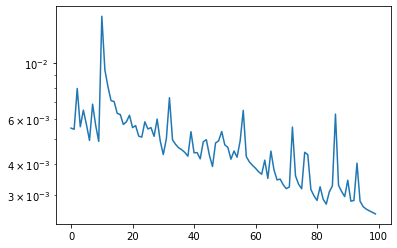

In [174]:
plt.semilogy(training_history.history['loss'])

***Testing***

In [175]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
print(x_test.shape)
print(t_test.shape)

(200, 200)
(200, 200)


Evaluate the test data

In [176]:
u_eval = u.eval(model, [x_test, t_test])
u_eval.shape

(200, 200)

In [188]:
# the weights and biases of model
u.get_weights()
# the number of parameters
u.count_params()

3021

C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_5732/2453502099.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_test, t_test, u_eval, cmap='seismic')


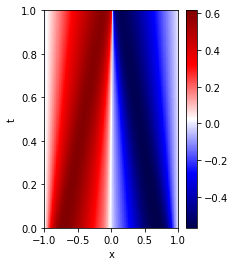

In [ ]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_eval, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [ ]:
# model.solve([x_train, t_train], u_eval, epochs=32, batches=10)
u_pred = model.predict([x_test, t_test], batch_size=None, verbose=0, steps=None)
np.array(u_pred).shape

C:\Users\YouSsef-pc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(4, 200, 200)

C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_5732/627205696.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_test, t_test, u_pred[0], cmap='seismic')


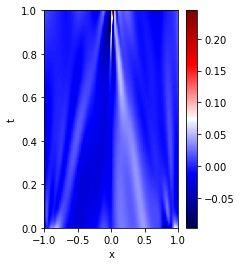

In [ ]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred[0], cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [ ]:
# example prediction 
x = np.array([[0.5]])
t = np.array([[0.5]])
print(model.predict([x, t]))
print(u.eval(model, [x, t]))

[array([[-0.00896014]], dtype=float32), array([[0.]], dtype=float32), array([[-0.]], dtype=float32), array([[-0.]], dtype=float32)]
[[-0.53477156]]


<function matplotlib.pyplot.show(close=None, block=None)>

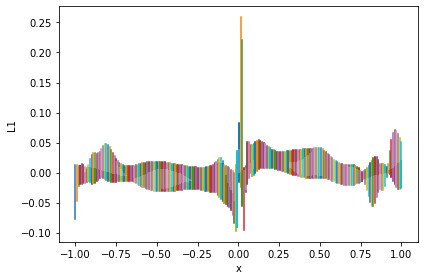

In [ ]:
plt.plot(x_test, u_pred[0])
plt.xlabel('x')
plt.ylabel('L1')
plt.tight_layout()
plt.show    

<function matplotlib.pyplot.show(close=None, block=None)>

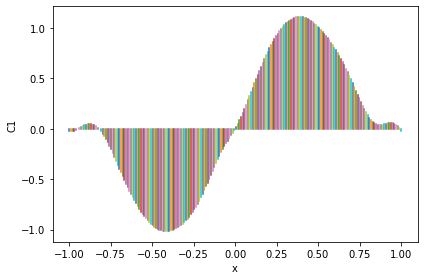

In [ ]:
plt.plot(x_test, u_pred[1])
plt.xlabel('x')
plt.ylabel('C1')
plt.tight_layout()
plt.show    